In [33]:
## Load in the necessary libraries
import requests # pip install requests
from bs4 import BeautifulSoup as bs #pip install beautifulsoup4
import pandas as pd
import sqlite3 as sql

In [34]:

path = "C:\\Users\\thebr\\Desktop\\492\\" 
csvpathlist = []
conn = sql.connect('draftguru.db')
c = conn.cursor()

In [134]:
requestlist = ["https://lol.fandom.com/wiki/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=LCS+2022+Summer&PBH%5Btextonly%5D=Yes&_run=",
               "https://lol.fandom.com/wiki/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=LEC+2022+Summer&PBH%5Btextonly%5D=Yes&_run=",
               "https://lol.fandom.com/wiki/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=LPL+2022+Summer&PBH%5Btextonly%5D=Yes&_run=",
               "https://lol.fandom.com/wiki/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=LCK+2022+Summer&PBH%5Btextonly%5D=Yes&_run=",
               "https://lol.fandom.com/wiki/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=PCS+2022+Summer&PBH%5Btextonly%5D=Yes&_run=",
              "https://lol.fandom.com/wiki/Special:RunQuery/PickBanHistory?PBH%5Bpage%5D=VCS+2022+Summer&PBH%5Btextonly%5D=Yes&_run="]
# The order is LCS (North America), LEC (Europe), LPL (China), LCK (Korea), PCS (Taiwan + Southeast Asia), VCS (Vietnam)
counter = 1
for html in requestlist:
    test = requests.get(html)
    soup = bs(test.content)
    table = soup.select('table#pbh-table.wikitable.plainlinks.hoverable-rows.column-show-hide-1')[0]
    table_df = pd.read_html(str(table))[0]
    table_df.columns = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35"]
    table_df = table_df.drop(["35","34"], axis = 1)
    
    if counter == 1:
        df = table_df
    else:
        df = pd.concat([df,table_df], ignore_index = True, sort = False)
        
    counter += 1
df.columns = ['Phase', "Blue","Red","Score","Winner","Patch","BB1","RB1","BB2","RB2","BB3","RB3","BP1","RP1-2","BP2-3","RP3","RB4",
              "BB4","RB5","BB5","RP4","BP4-5","RP5","BR1","BR2","BR3","BR4","BR5","RR1","RR2","RR3","RR4","RR5"]

In [136]:
df

,Phase,Blue,Red,Score,Winner,Patch,BB1,RB1,BB2,RB2,...,BR1,BR2,BR3,BR4,BR5,RR1,RR2,RR3,RR4,RR5
0,Week 6,Counter Logic Gaming,Dignitas,1 - 0,1,12.13,Viego,Taliyah,Ahri,Poppy,...,Mid,Support,Bot,Jungle,Top,Bot,Mid,Support,Jungle,Top
1,Week 6,100 Thieves,Immortals,1 - 0,1,12.13,Kalista,Zeri,Poppy,Sylas,...,Mid,Bot,Top,Jungle,Support,Bot,Jungle,Mid,Top,Support
2,Week 6,Cloud9,Team Liquid,1 - 0,1,12.13,Seraphine,Taliyah,Trundle,Poppy,...,Support,Bot,Top,Mid,Jungle,Bot,Support,Jungle,Top,Mid
3,Week 6,Evil Geniuses.NA,FlyQuest,1 - 0,1,12.13,Ahri,Gangplank,Taliyah,Poppy,...,Mid,Bot,Support,Jungle,Top,Jungle,Mid,Bot,Support,Top
4,Week 6,TSM,Golden Guardians,1 - 0,1,12.13,Kalista,Taliyah,Wukong,Zeri,...,Mid,Jungle,Top,Bot,Support,Jungle,Top,Mid,Bot,Support
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Week 1,GAM Esports,SBTC Esports,1 - 2,2,12.12,Lee Sin,Corki,Taliyah,Lucian,...,Jungle,Bot,Mid,Support,Top,Bot,Jungle,Mid,Support,Top
708,Week 1,SBTC Esports,GAM Esports,1 - 1,2,12.12,Senna,Lee Sin,Lucian,Wukong,...,Jungle,Mid,Top,Bot,Support,Bot,Mid,Top,Jungle,Support
709,Week 1,GAM Esports,SBTC Esports,0 - 1,2,12.12,Lee Sin,Lucian,Taliyah,Senna,...,Jungle,Bot,Support,Mid,Top,Bot,Jungle,Support,Top,Mid
710,Week 1,AS Esports,Team Whales,0 - 2,2,12.12,Azir,Zeri,Xin Zhao,Swain,...,Bot,Jungle,Support,Top,Mid,Jungle,Top,Mid,Bot,Support


In [137]:
lol = df.values.tolist()

In [138]:
command = """CREATE TABLE IF NOT EXISTS
matchtable(Phase varchar(7), Blue varchar(21), Red varchar(21), Score varchar(5),
Winner int, Patch varchar(5), BB1 varchar(21), RB1 varchar(21), BB2 varchar(21),
RB2 varchar(21), BB3 varchar(21), RB3 varchar(21), BP1 varchar(21), RP1 varchar(21),
RP2 varchar(21), BP2 varchar(21), BP3 varchar(21), RP3 varchar(21), RB4 varchar(21),
BB4 varchar(21), RB5 varchar(21), BB5 varchar(21), RP4 varchar(21), BP4 varchar(21),
BP5 varchar(21), RP5 varchar(21), BR1 varchar(7), BR2 varchar(7),
BR3 varchar(7), BR4 varchar(7), BR5 varchar(7), RR1 varchar(7), RR2 varchar(7), 
RR3 varchar(7), RR4 varchar(7), RR5 varchar(7), primary key(Phase, Blue, Red, Score))"""
c.execute(command)

In [139]:
command = """INSERT INTO matchtable VALUES"""

for match in lol:
    matchcommand =  "("
    for i in range(len(match)):
        if type(match[i]) != str:
            match[i] = str(match[i])
        if "'" in match[i]:
                match[i] = match[i].replace("'", "")
        if (i < 6 or i > 22) and i < 32:
            matchcommand = matchcommand + "'" + match[i] + "',"
        elif i == 32:
            matchcommand = matchcommand + "'" + match[i] + "')"
        else:
            
            if i == 13 or i == 14 or i == 21:
                x = match[i].split(", ")
                matchcommand = matchcommand + "'" + x[0] + "',"
                matchcommand = matchcommand + "'" + x[1] + "',"
            else:
                matchcommand = matchcommand + "'" + match[i] + "',"
        if "MISSING DATA" in matchcommand:
            matchcommand = matchcommand.replace("MISSING DATA", "NULL")
        elif "None" in matchcommand:
            matchcommand = matchcommand.replace("None", "NULL")
    command2 = command + matchcommand
    c.execute(command2)        

In [135]:
c.execute('DROP TABLE matchtable')

In [140]:
c.execute('SELECT * FROM matchtable')
results = c.fetchall()
query = "SELECT * FROM matchtable"
df2 = pd.read_sql_query(query, conn)
df2

,Phase,Blue,Red,Score,Winner,Patch,BB1,RB1,BB2,RB2,...,BR1,BR2,BR3,BR4,BR5,RR1,RR2,RR3,RR4,RR5
0,Week 6,Counter Logic Gaming,Dignitas,1 - 0,1,12.13,Viego,Taliyah,Ahri,Poppy,...,Mid,Support,Bot,Jungle,Top,Bot,Mid,Support,Jungle,Top
1,Week 6,100 Thieves,Immortals,1 - 0,1,12.13,Kalista,Zeri,Poppy,Sylas,...,Mid,Bot,Top,Jungle,Support,Bot,Jungle,Mid,Top,Support
2,Week 6,Cloud9,Team Liquid,1 - 0,1,12.13,Seraphine,Taliyah,Trundle,Poppy,...,Support,Bot,Top,Mid,Jungle,Bot,Support,Jungle,Top,Mid
3,Week 6,Evil Geniuses.NA,FlyQuest,1 - 0,1,12.13,Ahri,Gangplank,Taliyah,Poppy,...,Mid,Bot,Support,Jungle,Top,Jungle,Mid,Bot,Support,Top
4,Week 6,TSM,Golden Guardians,1 - 0,1,12.13,Kalista,Taliyah,Wukong,Zeri,...,Mid,Jungle,Top,Bot,Support,Jungle,Top,Mid,Bot,Support
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Week 1,GAM Esports,SBTC Esports,1 - 2,2,12.12,Lee Sin,Corki,Taliyah,Lucian,...,Jungle,Bot,Mid,Support,Top,Bot,Jungle,Mid,Support,Top
708,Week 1,SBTC Esports,GAM Esports,1 - 1,2,12.12,Senna,Lee Sin,Lucian,Wukong,...,Jungle,Mid,Top,Bot,Support,Bot,Mid,Top,Jungle,Support
709,Week 1,GAM Esports,SBTC Esports,0 - 1,2,12.12,Lee Sin,Lucian,Taliyah,Senna,...,Jungle,Bot,Support,Mid,Top,Bot,Jungle,Support,Top,Mid
710,Week 1,AS Esports,Team Whales,0 - 2,2,12.12,Azir,Zeri,Xin Zhao,Swain,...,Bot,Jungle,Support,Top,Mid,Jungle,Top,Mid,Bot,Support


In [214]:
df2list = df2.values.tolist()
champion_pool = set()
for match in df2list:
    for i in range(len(match)):
        if i >= 6 and i <=25:
            if match[i] != "NULL":
                champion_pool.add(match[i])
champion_pool = list(champion_pool)

champion_pool.sort()

champ_id = 1
count = 0
banned = 0
picked = 0

banned_early = 0
banned_late = 0


blue_side = 0
red_side = 0

wins = 0
r_wins = 0
b_wins = 0

prescence_list = []

roles = []
role_info = []

side_data = []

pos_data = []
BP1 = 0
BP2_3 = 0
BP4_5 = 0
RP1_2 = 0
RP3 = 0
RP4 = 0
RP5 = 0

BP1W = 0
BP2_3W = 0
BP4_5W = 0
RP1_2W = 0
RP3W = 0
RP4W = 0
RP5W = 0

for champion in champion_pool:
    role_info.append(champ_id)
    for match in df2list:
        for i in range(len(match)):
            if i>= 6 and i <=25:
                if champion == match[i]:
                    count += 1
                    if i < 12:
                        banned += 1
                        banned_early += 1
                    elif i < 18:
                        picked += 1
                        if i == 12:
                            blue_side += 1
                            BP1 += 1
                            role_info.append(match[26])
                            if match[4] == 1:
                                b_wins += 1
                                BP1W += 1
                        elif i == 13:
                            red_side += 1
                            RP1_2 += 1
                            role_info.append(match[31])
                            if match[4] == 2:
                                r_wins += 1
                                RP1_2W += 1
                        elif i == 14:
                            red_side += 1
                            RP1_2 += 1
                            role_info.append(match[32])
                            if match[4] == 2:
                                r_wins += 1
                                RP1_2W += 1
                        elif i == 15:
                            blue_side += 1
                            BP2_3 += 1
                            role_info.append(match[27])
                            if match[4] == 1:
                                b_wins += 1
                                BP2_3W += 1
                        elif i == 16:
                            blue_side += 1
                            BP2_3 += 1
                            role_info.append(match[28])
                            if match[4] == 1:
                                b_wins += 1
                                BP2_3W += 1
                        elif i == 17:
                            red_side += 1
                            RP3 += 1
                            role_info.append(match[33])
                            if match[4] == 2:
                                r_wins += 1
                                RP3W += 1
                    elif i < 22:
                        banned += 1
                        banned_late += 1
                    else:
                        picked += 1
                        if i == 22:
                            red_side += 1
                            RP4 += 1
                            role_info.append(match[34])
                            if match[4] == 2:
                                r_wins += 1
                                RP4W += 1
                        elif i == 23:
                            blue_side += 1
                            BP4_5 += 1
                            role_info.append(match[29])
                            if match[4] == 1:
                                b_wins += 1
                                BP4_5W += 1
                        elif i == 24:
                            blue_side += 1
                            BP4_5 += 1
                            role_info.append(match[30])
                            if match[4] == 1:
                                b_wins += 1
                                BP4_5W += 1
                        elif i == 25:
                            red_side += 1
                            RP5 += 1
                            role_info.append(match[35])
                            if match[4] == 2:
                                r_wins += 1
                                RP5W += 1
                                
    prescence_perc = (count / ((len(df2list)))) * 100            
    prescence_perc = float("{0:.3f}".format(prescence_perc))
    
    roles.append(role_info) # no. of times a champ appeared each role
    
    wins = r_wins + b_wins
    
    if picked != 0:
        winrate = (wins / picked) * 100
        winrate = float("{0:.3f}".format(winrate))
    else:
        winrate = 0
    prescence_list.append([champ_id, champion, prescence_perc, banned, picked, winrate])
    
    if red_side != 0:
        rwinrate = (r_wins / red_side) * 100
        rwinrate = float("{0:.3f}".format(rwinrate))
    else:
        rwinrate = 0
    if blue_side != 0:
        bwinrate = (b_wins / blue_side) * 100
        bwinrate = float("{0:.3f}".format(bwinrate))
    else: 
        bwinrate = 0
    
    side_data.append([champ_id, picked, blue_side, bwinrate, red_side, rwinrate])
    
    if BP1 != 0:
        bp1wr = (BP1W / BP1) * 100
        bp1wr = float("{0:.3f}".format(bp1wr))
    else: 
        bp1wr = 0
    if BP2_3 != 0:
        bp23wr = (BP2_3W / BP2_3) * 100
        bp23wr = float("{0:.3f}".format(bp23wr))
    else:
        bp23wr = 0
    if BP4_5 != 0:
        bp45wr = (BP4_5W / BP4_5) * 100
        bp45wr = float("{0:.3f}".format(bp45wr))
    else:
        bp45wr = 0
    if RP1_2 != 0:
        rp12wr = (RP1_2W / RP1_2) * 100
        rp12wr = float("{0:.3f}".format(rp12wr))
    else:
        rp12wr = 0
    if RP3 != 0:
        rp3wr = (RP3W / RP3) * 100
        rp3wr = float("{0:.3f}".format(rp3wr))
    else:
        rp3wr = 0
    if RP4 != 0:
        rp4wr = (RP4W / RP4) * 100
        rp4wr = float("{0:.3f}".format(rp4wr))
    else: 
        rp4wr = 0
    if RP5 != 0:
        rp5wr = (RP5W / RP5) * 100
        rp5wr = float("{0:.3f}".format(rp5wr))
    else:
        rp5wr = 0
    
    pos_data.append([champ_id, picked, BP1, BP2_3, BP4_5, RP1_2, RP3, RP4, RP5,
                          bp1wr, bp23wr, bp45wr, rp12wr, rp3wr, rp4wr, rp5wr])
    
    champ_id += 1
    count = 0
    banned = 0
    picked = 0
    
    banned_early = 0
    banned_late = 0


    blue_side = 0
    red_side = 0

    wins = 0
    r_wins = 0
    b_wins = 0
    
    role_info = []
    
    BP1 = 0
    BP2_3 = 0
    BP4_5 = 0
    RP1_2 = 0
    RP3 = 0
    RP4 = 0
    RP5 = 0

    BP1W = 0
    BP2_3W = 0
    BP4_5W = 0
    RP1_2W = 0
    RP3W = 0
    RP4W = 0
    RP5W = 0
    
print(prescence_list)


[[1, 'Aatrox', 5.478, 5, 34, 44.118], [2, 'Ahri', 61.236, 242, 194, 53.608], [3, 'Akali', 13.202, 44, 50, 44.0], [4, 'Akshan', 0.281, 1, 1, 100.0], [5, 'Alistar', 9.831, 20, 50, 46.0], [6, 'Amumu', 14.607, 39, 65, 46.154], [7, 'Anivia', 0.14, 0, 1, 0.0], [8, 'Aphelios', 46.489, 67, 264, 49.621], [9, 'Ashe', 5.337, 8, 30, 56.667], [10, 'Azir', 53.511, 197, 184, 46.196], [11, 'Bard', 3.09, 9, 13, 61.538], [12, 'BelVeth', 3.652, 16, 10, 50.0], [13, 'Blitzcrank', 1.124, 1, 7, 85.714], [14, 'Brand', 0.14, 0, 1, 100.0], [15, 'Braum', 15.309, 34, 75, 44.0], [16, 'Caitlyn', 0.562, 1, 3, 33.333], [17, 'Camille', 8.567, 19, 42, 45.238], [18, 'Cassiopeia', 0.281, 1, 1, 100.0], [19, 'Corki', 50.0, 225, 131, 51.145], [20, 'Darius', 1.124, 8, 0, 0], [21, 'Diana', 6.882, 31, 18, 66.667], [22, 'Dr. Mundo', 0.14, 0, 1, 100.0], [23, 'Draven', 16.994, 80, 41, 43.902], [24, 'Elise', 0.562, 2, 2, 100.0], [25, 'Ezreal', 29.635, 78, 133, 44.361], [26, 'Fiora', 22.893, 123, 40, 47.5], [27, 'Galio', 13.624, 52

In [144]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Distribution of Champion Winrate


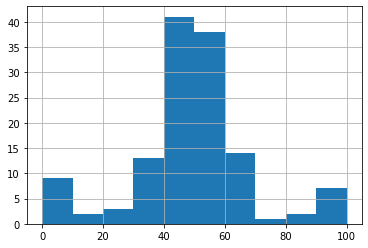

,ChampID,Presence,BanCount,PickCount,Winrate
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65.500000,15.368385,54.653846,54.769231,47.953554
std,37.671829,21.301471,88.101308,74.049171,20.628159
min,1.000000,0.140000,0.000000,0.000000,0.000000
25%,33.250000,1.124000,2.000000,5.000000,41.977500
50%,65.500000,5.337000,15.000000,19.000000,49.293500
75%,97.750000,18.890250,66.750000,73.000000,54.545000
max,130.000000,84.551000,437.000000,355.000000,100.000000


In [168]:
df1 = pd.DataFrame(prescence_list)
df1.columns = ['ChampID','Name','Presence','BanCount','PickCount', 'Winrate']
winrate = df1.Winrate.hist()
print('Distribution of Champion Winrate')
plt.show()
df1.describe()

In [177]:
role_list = []
champid = 0
for champ in roles:
    topcnt = 0
    jngcnt = 0
    midcnt = 0
    botcnt = 0
    supcnt = 0
    for role in champ:
        if role == 'Top':
            topcnt += 1
        elif role == 'Jungle':
            jngcnt += 1
        elif role == 'Mid':
            midcnt += 1
        elif role == 'Bot':
            botcnt += 1
        elif role == 'Support':
            supcnt += 1
        else:
            champid += role
    picks = topcnt + jngcnt + midcnt + botcnt + supcnt
    role_list.append([champid, topcnt, jngcnt, botcnt, supcnt, picks])
    topcnt = 0
    jngcnt = 0
    midcnt = 0
    botcnt = 0
    supcnt = 0
    champid = 0
df_roles = pd.DataFrame(role_list)
df_roles.columns = ['ChampID', 'Top', 'Jungle', 'Mid', 'Bot', 'Support']
df_roles

,ChampID,Top,Jungle,Mid,Bot,Support
0,1,33,0,0,0,34
1,2,0,0,0,0,194
2,3,13,0,0,0,50
3,4,1,0,0,0,1
4,5,0,0,0,50,50
...,...,...,...,...,...,...
125,126,0,1,0,0,1
126,127,1,0,164,0,165
127,128,0,0,0,0,1
128,129,0,0,0,6,9


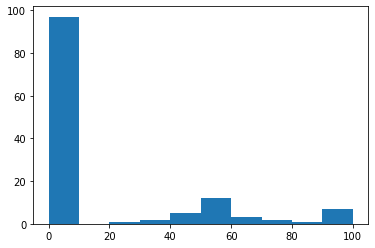

In [206]:
df_pos_data = pd.DataFrame(pos_data)
df_pos_data
df_pos_data.columns = ["ChampID","Pick Count", "BP1", "BP2_3","BP4_5", "RP1_2",
                       "RP3", "RP4", "RP5", "bp1wr", "bp23wr", "bp45wr", 
                       "rp12wr", "rp3wr", "rp4wr", "rp5wr"]
#df3 = df_pos_data.drop(['Pick Count', "BP1", "BP2_3","BP4_5", "RP1_2", "RP3", 
                        #"RP4", "RP5"], axis = 1)
df_pos_data['bp1wr'].dropna()
plt.hist(df_pos_data.bp1wr)
plt.show()

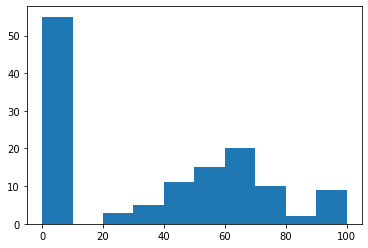

In [207]:
plt.hist(df_pos_data.bp23wr)
plt.show()

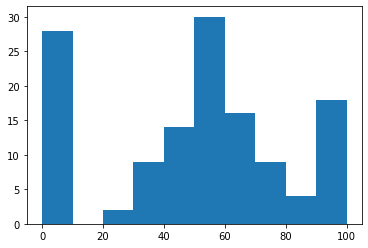

In [208]:
plt.hist(df_pos_data.bp45wr)
plt.show()

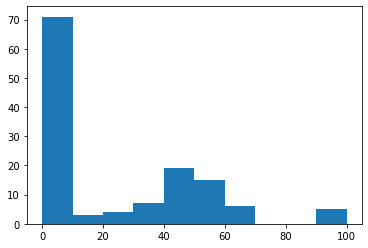

In [209]:
plt.hist(df_pos_data.rp12wr)
plt.show()

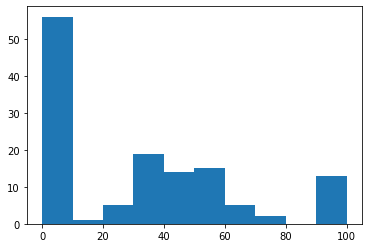

In [210]:
plt.hist(df_pos_data.rp3wr)
plt.show()

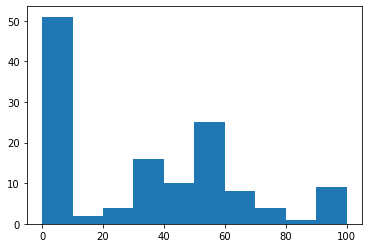

In [211]:
plt.hist(df_pos_data.rp4wr)
plt.show()

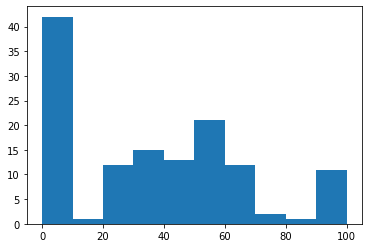

In [212]:
plt.hist(df_pos_data.rp5wr)
plt.show()

In [215]:
df_side_data = pd.DataFrame(side_data)
df_side_data.columns = ["champ_id", "picked", "blue_side", "bwinrate", 
                        "red_side", "rwinrate"]
df_side_data.describe()

,champ_id,picked,blue_side,bwinrate,red_side,rwinrate
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65.500000,54.769231,27.384615,51.418962,27.384615,38.289600
std,37.671829,74.049171,38.249970,28.509934,36.465421,23.076463
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.250000,5.000000,2.000000,44.527000,3.000000,32.902500
50%,65.500000,19.000000,9.000000,54.319500,9.000000,41.707500
75%,97.750000,73.000000,37.250000,66.667000,35.750000,50.000000
max,130.000000,355.000000,175.000000,100.000000,185.000000,100.000000


Distribution of Blue Side Champion Winrate


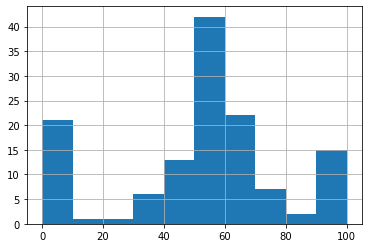

In [216]:
winrate = df_side_data.bwinrate.hist()
print('Distribution of Blue Side Champion Winrate')
plt.show()

Distribution of Red Side Champion Winrate


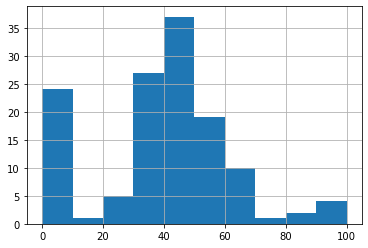

In [217]:
winrate = df_side_data.rwinrate.hist()
print('Distribution of Red Side Champion Winrate')
plt.show()

In [219]:
df1.to_csv(r"C:\\Users\\thebr\\Desktop\\492\\Prescence_list")
df_roles.to_csv(r"C:\\Users\\thebr\\Desktop\\492\\Roles")
df_pos_data.to_csv(r"C:\\Users\\thebr\\Desktop\\492\\Pos_data")